<a href="https://colab.research.google.com/github/lanashin/Projects/blob/main/Airbnb_nyc2019_Vizualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration on Airbnb NYC Open Data 2019

### Abstract:

**The goal for the project:**

The goal of the project is to analyze an existing project that contains several data
visualizations, suggest other ways of visualization the same data, compare different types of
visualizations for the same data and reason what visualization is optimal and why.

I decided to do my project about Airbnb. Airbnb is a paid community platform for renting and booking private accommodation founded in 2008.
Airbnb allows individuals to rent all or part of their own homes as extra accommodation. The site offers a search and booking platform between the person offering their accommodation and the vacationer who wishes to rent it.
This dataset from the 2019 year was taken from Kaggle website, and it has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.
The existing project I used to suggest other ways to analyze the same data was taken from Kaggle website, belongs to DGOMONOV, and the link to his work is attached here: https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb/notebook

### Acquaring and Loading Data

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import geopandas as gpd

In [ ]:
# Read the data into a pandas DataFrame.
data = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#to check how many columns it has and what data types
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# First visualization:

## What the authod did?

The author used histogram presenting host_id and how many listing it had. I assumed there was better data to use in histogram and instead of host_id i showed how many listings were in every borough and neighborhoods. Creating new visualiztions.

In [ ]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=data.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df


,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

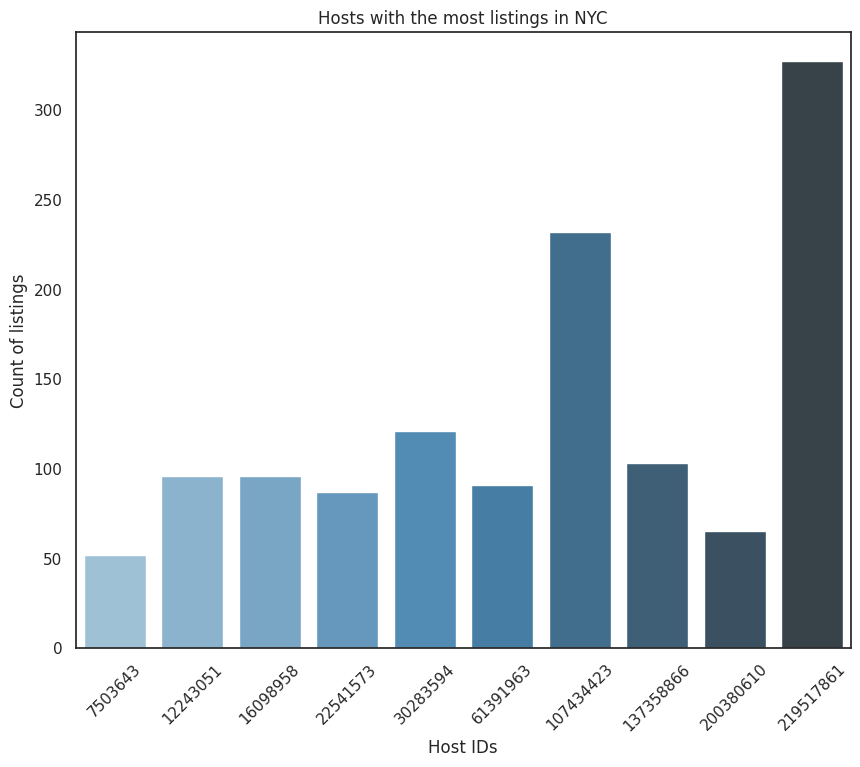

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

## What visualizations I did instead to show using diffrent attributes from the same data that we have:

### Question1: What borough in NYC do people use the most to rent Airbnb?

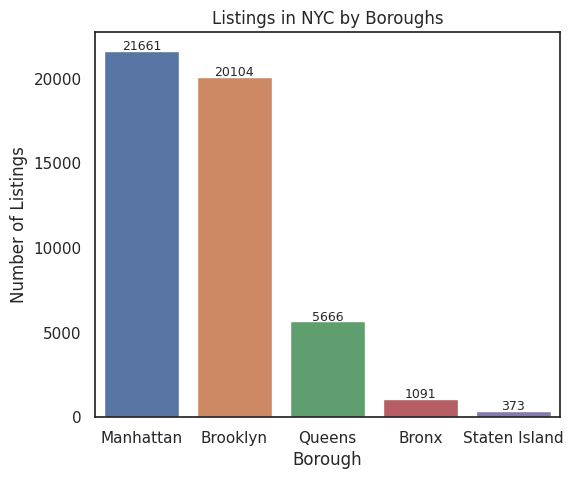

In [ ]:
top_boroughs = data['neighbourhood_group'].value_counts().nlargest(5)

plt.figure(figsize=(6,5))
sns.barplot(x=top_boroughs.index, y=top_boroughs.values) #color='#6495ed')
plt.title('Listings in NYC by Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')

# Add number of listings on top of each bar
for i, v in enumerate(top_boroughs.values):
    plt.text(i, v+50, str(v), ha='center', fontsize=9)

plt.show()

We can see from this chart that the most rented borough in NYC is Manhattan with 21,661 rents in 2019. It's not surprising because most of the tourist attractions happen in Manhattan and renting a place closer to attractions allows tourists to commute less in the city. Second, the most rented borough is Brooklyn with 20,104 rents in 2019 and it might be because it's cheaper to rent in Brooklyn than in Manhattan, it's a bigger territory and also close to Manhattan.



I also tried to show the borough on map:

In [ ]:
#Rename a column to accurately reflect Boroughs
data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

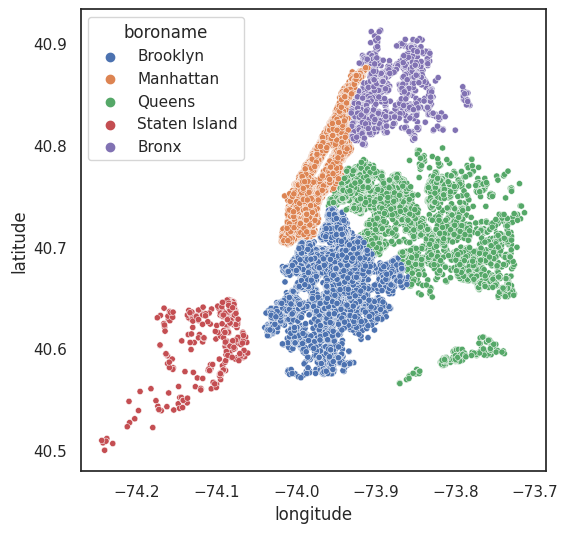

In [ ]:
#Review the listings by boroname
plt.figure(figsize=(6,6))
sns.scatterplot(x='longitude', y='latitude', hue='boroname',s=20, data=data) #s = size of the marker

We can see that histogram is still the preferred way to represent data about listings by borough because using histogram visualization, we can clearly see how many listings are shown on what borough, and what is not clear using scatter plots on the map.

### Question2: What are 5 of the most rented neighborhoods in NYC?

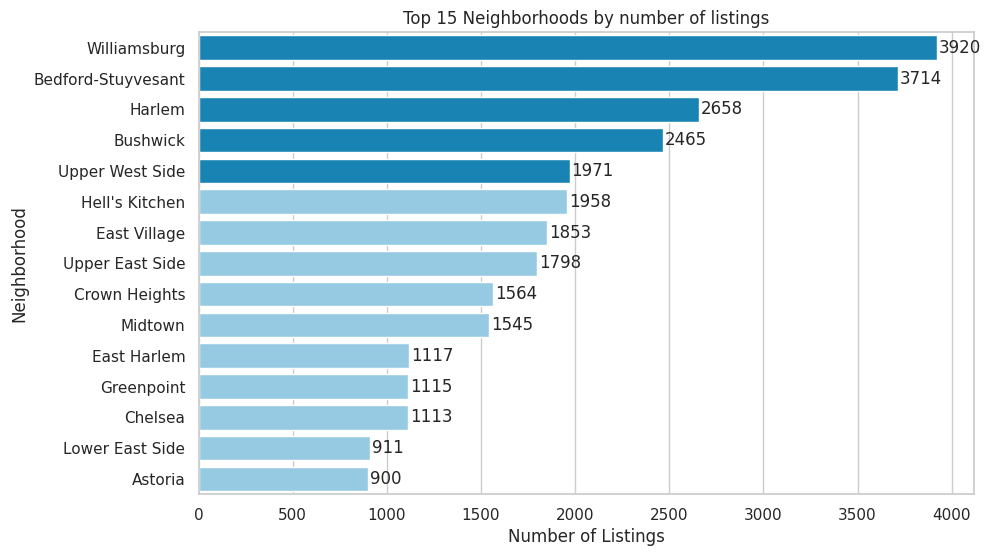

In [ ]:
top_neighborhoods = data['neighbourhood'].value_counts().nlargest(15)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h',
            palette=['#008ECC' if i < 5 else '#89CFF0' for i in range(len(top_neighborhoods))])
plt.title('Top 15 Neighborhoods by number of listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')

# add count numbers inside the frame
for i, count in enumerate(top_neighborhoods.values):
    plt.text(count + 10, i, str(count), va='center')

plt.show()

In this chart, presented the top 15 neighnorhoods in NYC that were rented the most by tourists. I choose top 15 neighborhoods becuse i wanted to include neighborhoods in Queens borough as well. I put in stronger color, 5 the most rented neighborhoods and how many listings they have.

Before selecting this presentation, I initially had an histogram with default colors. However, I made a deliberate choice not to utilize them in my final work. In my opinion, representing the top 5 colors of the most listed neighborhoods and assigning distinct colors to the remaining 10 neighborhoods provides a clearer depiction of the narrative conveyed by the graph, as opposed to a histogram with multiple colors.

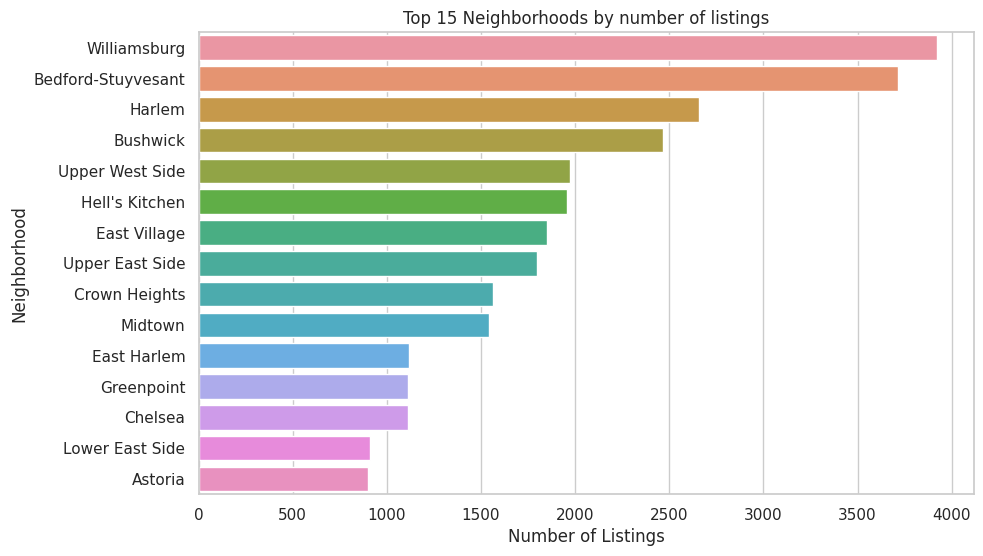

In [ ]:
top_neighborhoods = data['neighbourhood'].value_counts().nlargest(15)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h') #, color='#6495ed')
plt.title('Top 15 Neighborhoods by number of listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

# Second visualization:

## What author did:

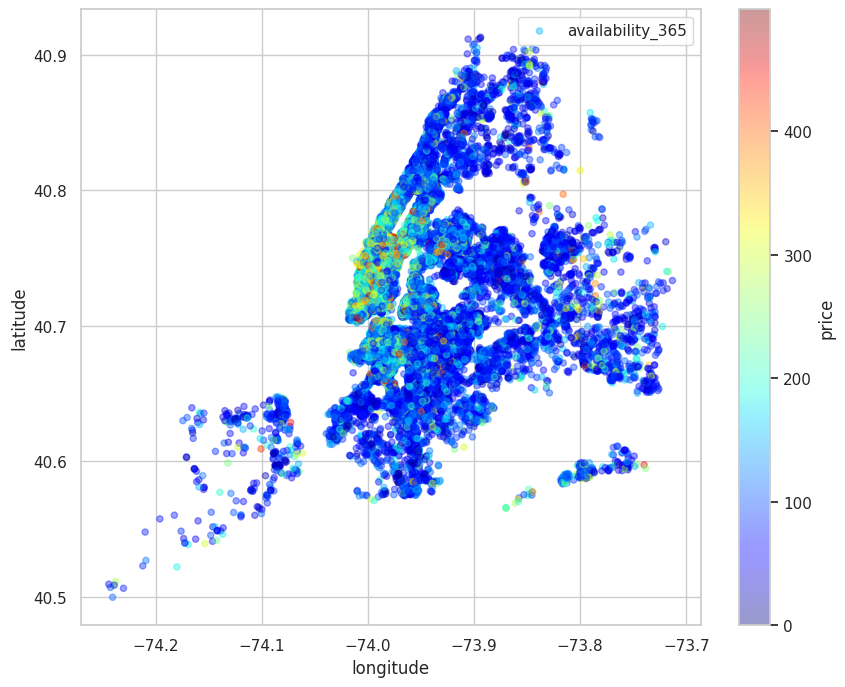

In [ ]:
#let's what we can do with our given longtitude and latitude columns
#creating a sub-dataframe with no extreme values / less than 500
sub_6=data[data.price < 500]

#let's see how scatterplot will come out
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

What visualizations I did do instead? I tried to work with the map to recognize that it is located on the NYC map first. I wanted to learn a new skill how to use a scatter plot presentation on a picture under.
Also, I tried to change different colors but came to the conclusion that 'get_cmap('jet')' is the best pallet that shows clearly the differences on the heat map for prices and also for the map itself.

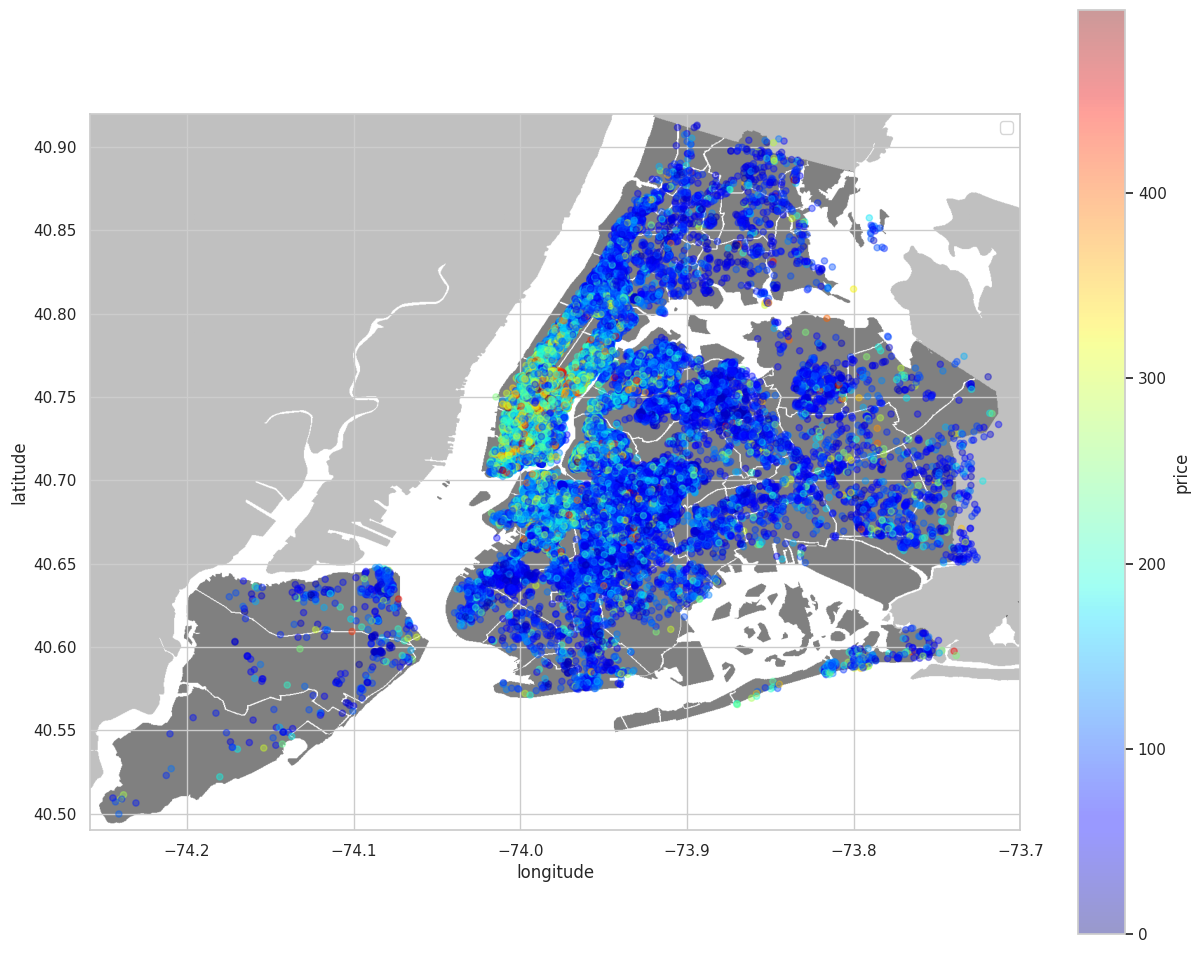

In [ ]:
import urllib.request # used for making HTTP requests to web pages and other online resources
import matplotlib.pyplot as plt

# creating a sub-dataframe with no extreme values, price less than 500
data_price = data[data.price < 500]

# downloading the png NYC image found on Google and saving to my local folder along with the project
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
filename, headers = urllib.request.urlretrieve(url)

# reading the image from the local file
nyc_img = plt.imread(filename)

# creating a bigger plot size
fig, ax = plt.subplots(figsize=(15, 12))

# using scatter plot
data_price.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

# plotting the image as background
ax.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

plt.legend()
plt.show()

## Question5: Can we present data on map using neighborhoods map?

In [ ]:
import geopandas as gpd

data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)

#Get a count by borough
borough_count = data.groupby('boroname').agg('count').reset_index()

#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

# read in the New York City boroughs data
boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))

# preview the first 5 rows of the data
print(boroughs.head(5))

#rename the column to boroname, so that we can join the data to it on a common field
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

# read the file for neighbors. Found it on this website: https://data.cityofnewyork.us/City-Government/2010-Neighborhood-Tabulation-Areas-NTAs-/cpf4-rkhq
hoods = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/nynta.csv")
hoods

<ipython-input-196-0811c9d5a0fd>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
<ipython-input-196-0811c9d5a0fd>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))


   BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...  


,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07
1,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07
2,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07
3,MULTIPOLYGON (((-73.98017161103701 40.66115465...,3,Brooklyn,47,BK40,Windsor Terrace,19033.672066,1.404167e+07
4,MULTIPOLYGON (((-73.88833929256353 40.64671022...,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07
...,...,...,...,...,...,...,...,...
190,MULTIPOLYGON (((-73.90129277627032 40.82047544...,2,Bronx,5,BX34,Melrose South-Mott Haven North,19589.196431,1.727176e+07
191,MULTIPOLYGON (((-73.89680883223774 40.79580844...,2,Bronx,5,BX39,Mott Haven-Port Morris,35604.790810,4.189861e+07
192,MULTIPOLYGON (((-73.9119181232027 40.843257886...,2,Bronx,5,BX63,West Concourse,28571.879354,1.936642e+07
193,MULTIPOLYGON (((-74.072581339395 40.6379418745...,5,Staten Island,85,SI22,West New Brighton-New Brighton-St. George,66052.593065,5.602857e+07


In [ ]:
from shapely import wkt #The wkt module is part of the shapely library, which provides tools for working with geometric objects in Python.

#rename the column
hoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#since this is a csv file, convert the geometry column text into well known text, this will allow me to plot its geometry correctly
hoods['geom'] = hoods['the_geom'].apply(wkt.loads)

#convert the pandas dataframe into a Geopandas GeoDataFrame
hoods = gpd.GeoDataFrame(hoods, geometry='geom')

#create a point of each Airbnb location, and enable the "data" dataframe into a geopandas dataframe
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

#this code runs an intersect analysis to find which neighborhood the Airbnb location is in
joined = gpd.sjoin(hoods, data, how='inner', op='intersects')
joined.head(3)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,neighbourhood_left,Shape_Leng,Shape_Area,geom,index_right,...,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",1103,...,40.67747,-73.76493,Shared room,39,1,454,2019-06-18,5.27,1,353
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",37794,...,40.67748,-73.76376,Entire home/apt,100,1,12,2019-02-17,1.69,1,161
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",35688,...,40.67783,-73.76637,Private room,83,2,2,2019-04-15,0.26,3,26


In [ ]:
joined.dtypes

the_geom                            object
BoroCode                             int64
BoroName                            object
CountyFIPS                           int64
NTACode                             object
neighbourhood_left                  object
Shape_Leng                         float64
Shape_Area                         float64
geom                              geometry
index_right                          int64
id                                   int64
name                                object
host_id                              int64
host_name                           object
boroname                            object
neighbourhood_right                 object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per

In [ ]:
#drop the second geometry column
joined.drop(columns='geom', inplace=True)

#rename the column.
joined.rename(columns={'neighbourhood_left':'neighbourhood'}, inplace=True)

#create a count of each neighborhood
nb_join_count = joined.groupby('neighbourhood').agg('count').reset_index()

#"true count". Join this data to the original neighborhoods geometry
true_count = hoods.merge(nb_join_count, on='neighbourhood')

Text(0.5, 1.0, 'Number of Airbnb listings by Neighborhood in NYC')

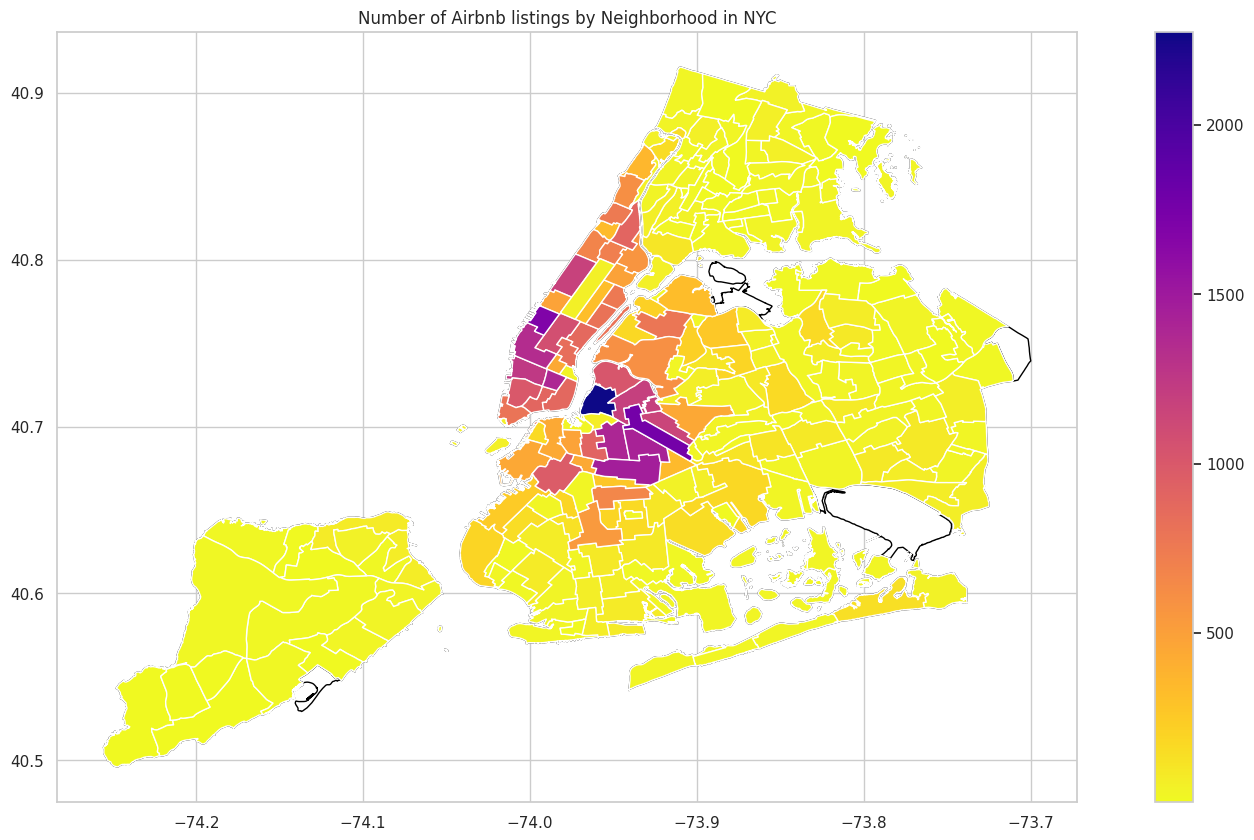

In [ ]:
#we plot the data
fig,ax = plt.subplots(1,1, figsize=(20,10))

base = hoods.plot(color='white', edgecolor='black', ax=ax)

true_count.plot(column='id',cmap='plasma_r', ax=base, legend=True)
plt.title('Number of Airbnb listings by Neighborhood in NYC')


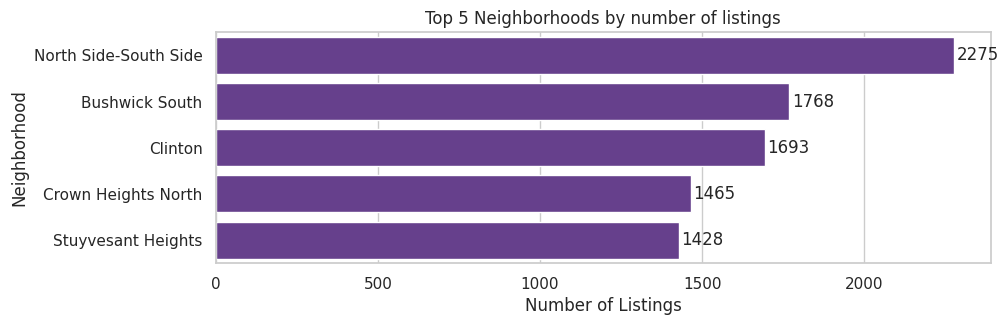

In [ ]:
top_neighborhoods = joined['neighbourhood'].value_counts().nlargest(5)
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h', color='#663399')
plt.title('Top 5 Neighborhoods by number of listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')

# add count numbers inside the frame
for i, count in enumerate(top_neighborhoods.values):
    plt.text(count + 8, i, str(count), va='center')

plt.show()

We can see on the map 5 main neighborhoods that have the highest number of listings. I also created the other chart to make sure that the data presented on the map is correct.

Eventually i decided to use the map with heatmap price presnted on NYC map picture. For me it was the most clear presentation.

# Third Visualization:

## What the author did:

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


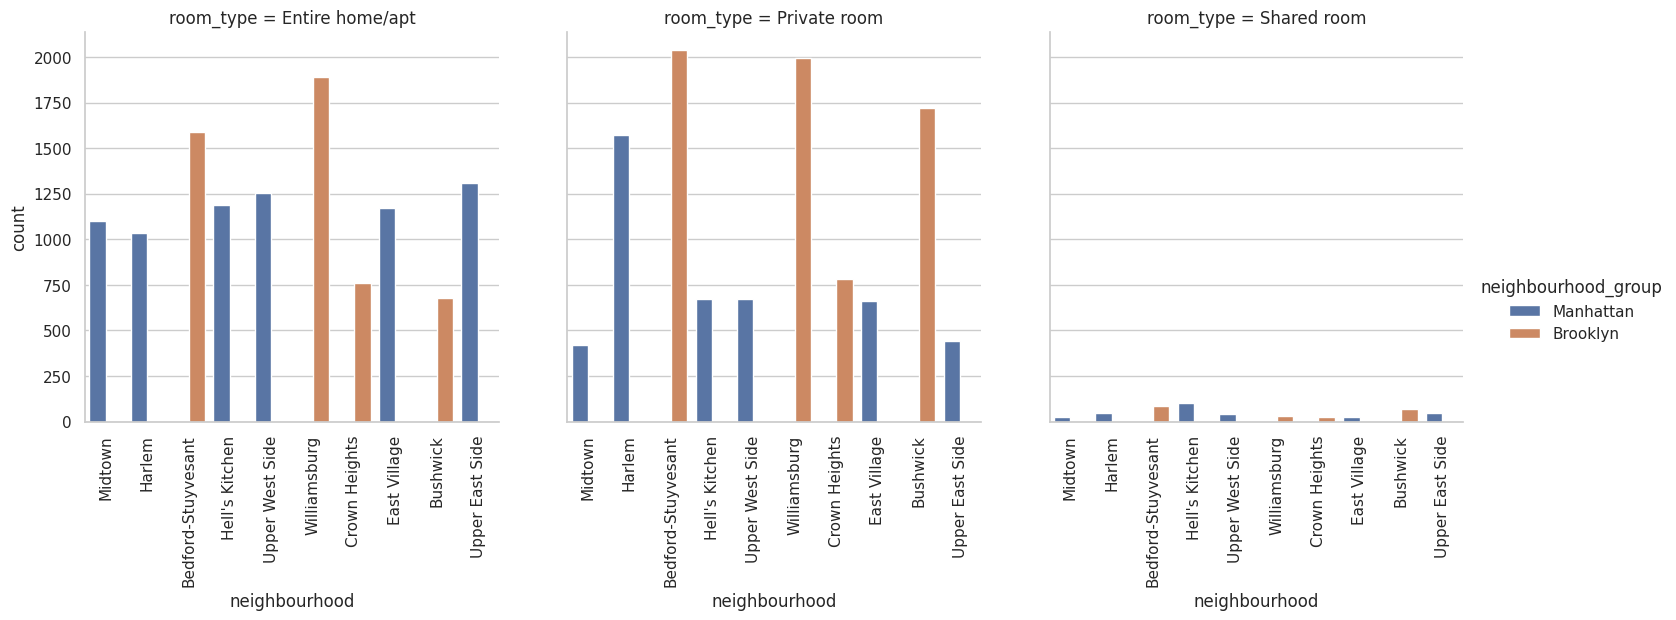

In [ ]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

## What visualizations I did instead to show using diffrent attributes from the same data that we have:

### Question3: What is the room type that was listed the most in top neighborhoods?

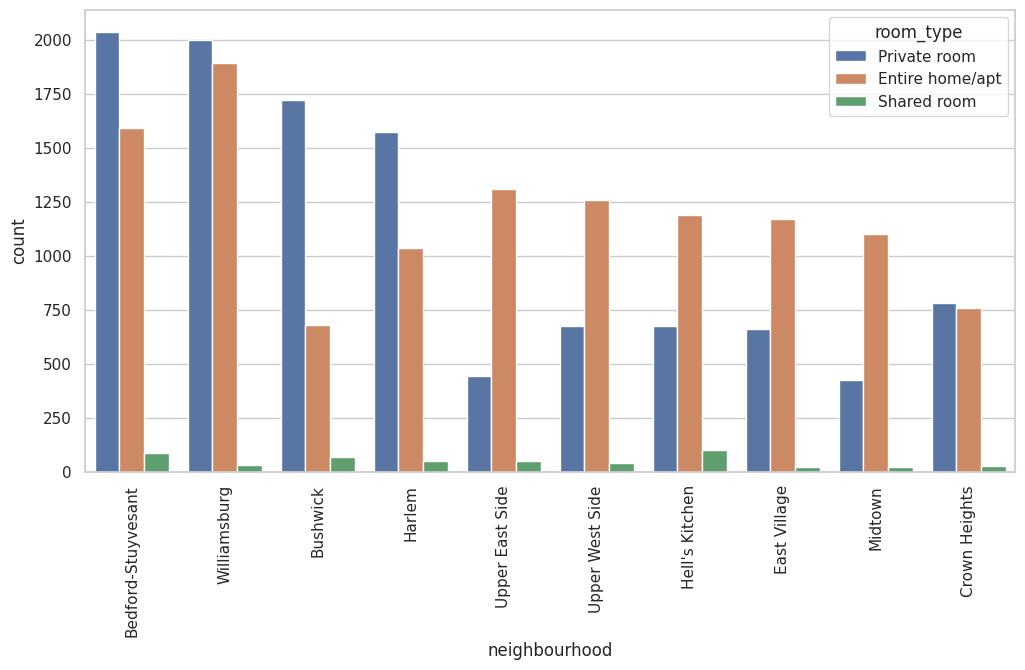

In [ ]:
# select only entire home/apt, private room, and shared room listings in Manhattan and Brooklyn for top 10 neighborhoods
top_neighborhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side',
                     'Hell\'s Kitchen', 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown']
sub_7 = data.loc[(data['room_type'].isin(['Entire home/apt', 'Private room', 'Shared room'])) &
                 (data['neighbourhood_group'].isin(['Manhattan', 'Brooklyn'])) &
                 (data['neighbourhood'].isin(top_neighborhoods))]

# group by neighborhood and room type, then calculate count and sort by count
grouped = sub_7.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')
grouped = grouped.sort_values(by='count', ascending=False)

# plot histogram of number of entire home/apt, private room, and shared room listings in Manhattan and Brooklyn
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='neighbourhood', y='count', hue='room_type')
plt.xticks(rotation=90)
plt.show()


This chart presented room types (Entire home/apt, Private room, Shared room) and we can see now besides the number of listings in different neighborhoods we can see the type of room that is listed. we can see that in Bedforford-Styvesant the most listed are Private room types and in Williamsburg, the most listed are entire home apartments. What can explain the higher numbers of rent in the previous chart.



Notes: The author used a great visualization that inever used before but would like to adopti in my future presentations. Violin prentation. And as prt of learning for visualization change i would like to add what I would like to keep and use it too in the future.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

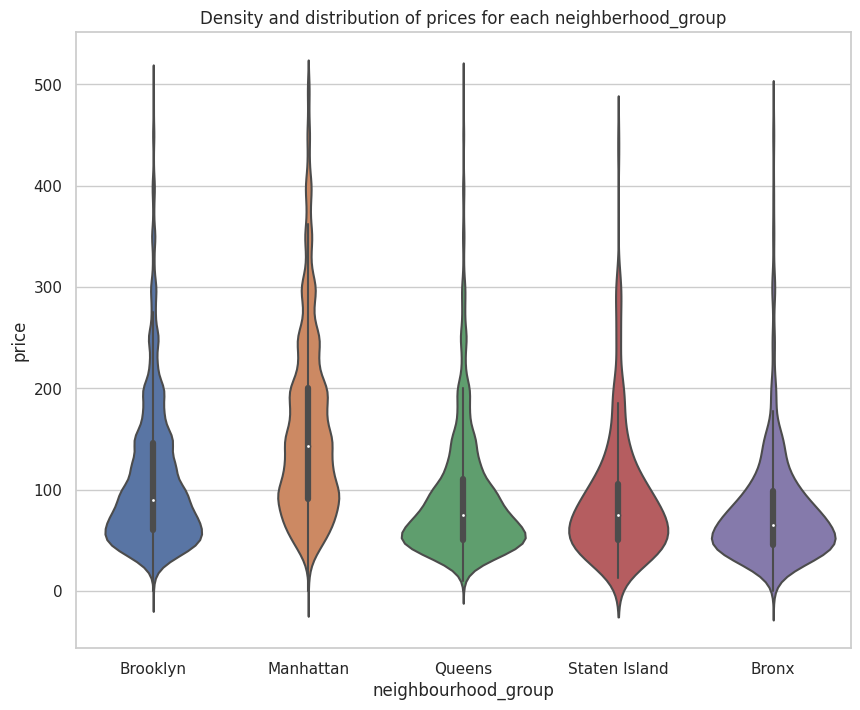

In [ ]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=data[data.price < 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')


When examining the violin visualization of Airbnb prices in the boroughs of NYC, several key observations can be made. Firstly, Manhattan exhibits the widest range of prices, with an average listing price of $150 per night.

Following closely behind is Brooklyn, with an average price of $90 per night. Both Queens and Staten Island display similar price distributions, while the Bronx emerges as the most affordable option among them all.

These findings align with expectations, as it is widely known that Manhattan ranks among the most expensive places globally to reside, whereas the Bronx tends to offer comparatively lower standards of living.

# Summary

-The borough that was listed the most in AIRBNB in 2019 is Manhattan (21661)and borough is listed a lot too is Brooklyn (20104) and its better presented in Histogram visualization

-The most listed neighborhoods in NYC IN AIRBNB 2019 are: Williamsburg (3920 listings), Bedford – Stuyvesant (3714 listings), Harlem(2658 listings),Bushwick (2465 listings), Upper west side (1971)

-Private rooms were rented more in 2019 than entire house or shared room
-And were rented in Brooklyn neighborhoods more than Manhattan

-On the map we see that the prices in NYC are higher in Manhattan than in Brooklyn even if in Brooklyn the rents are almost the same as in Manhattan

-The price range: even if the prices in Queens (50-100 dollars)

are lower than Manhattan (90-200 dollars) and Brooklyn (70-130 dollars)they are still rented less

-The price range and still less rented apartments can be explained because its far from tourists' attractions and smaller territory than Brooklyn